## Advanced Regression Assignment - Part 1

## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Objective - 
- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- The model will be a good way for the management to understand the pricing dynamics of a new market.
- Determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#import all libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns',None)

import os

### Data Import

In [2]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 81)

### 1. EDA -Data understanding and exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
10%,146.900000,20.000000,44.000000,5000.000000,5.000000,5.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1945.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000

### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; We will perform analysis on the target variable . 

In [6]:
# Let us check SalePrice for now
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

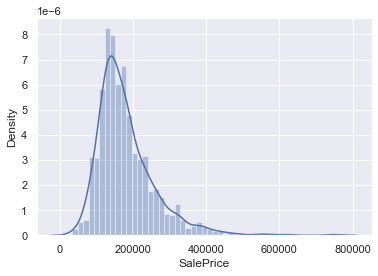

In [7]:
sns.distplot(housing['SalePrice'])

Inference - From the graph the right region is skewed 

Skewness-
is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0. 

In [8]:
from scipy import stats
housing['SalePrice'].skew()

1.8828757597682129

Kurtosis - is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution.

In [9]:
housing['SalePrice'].kurtosis()

6.536281860064529

In [10]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

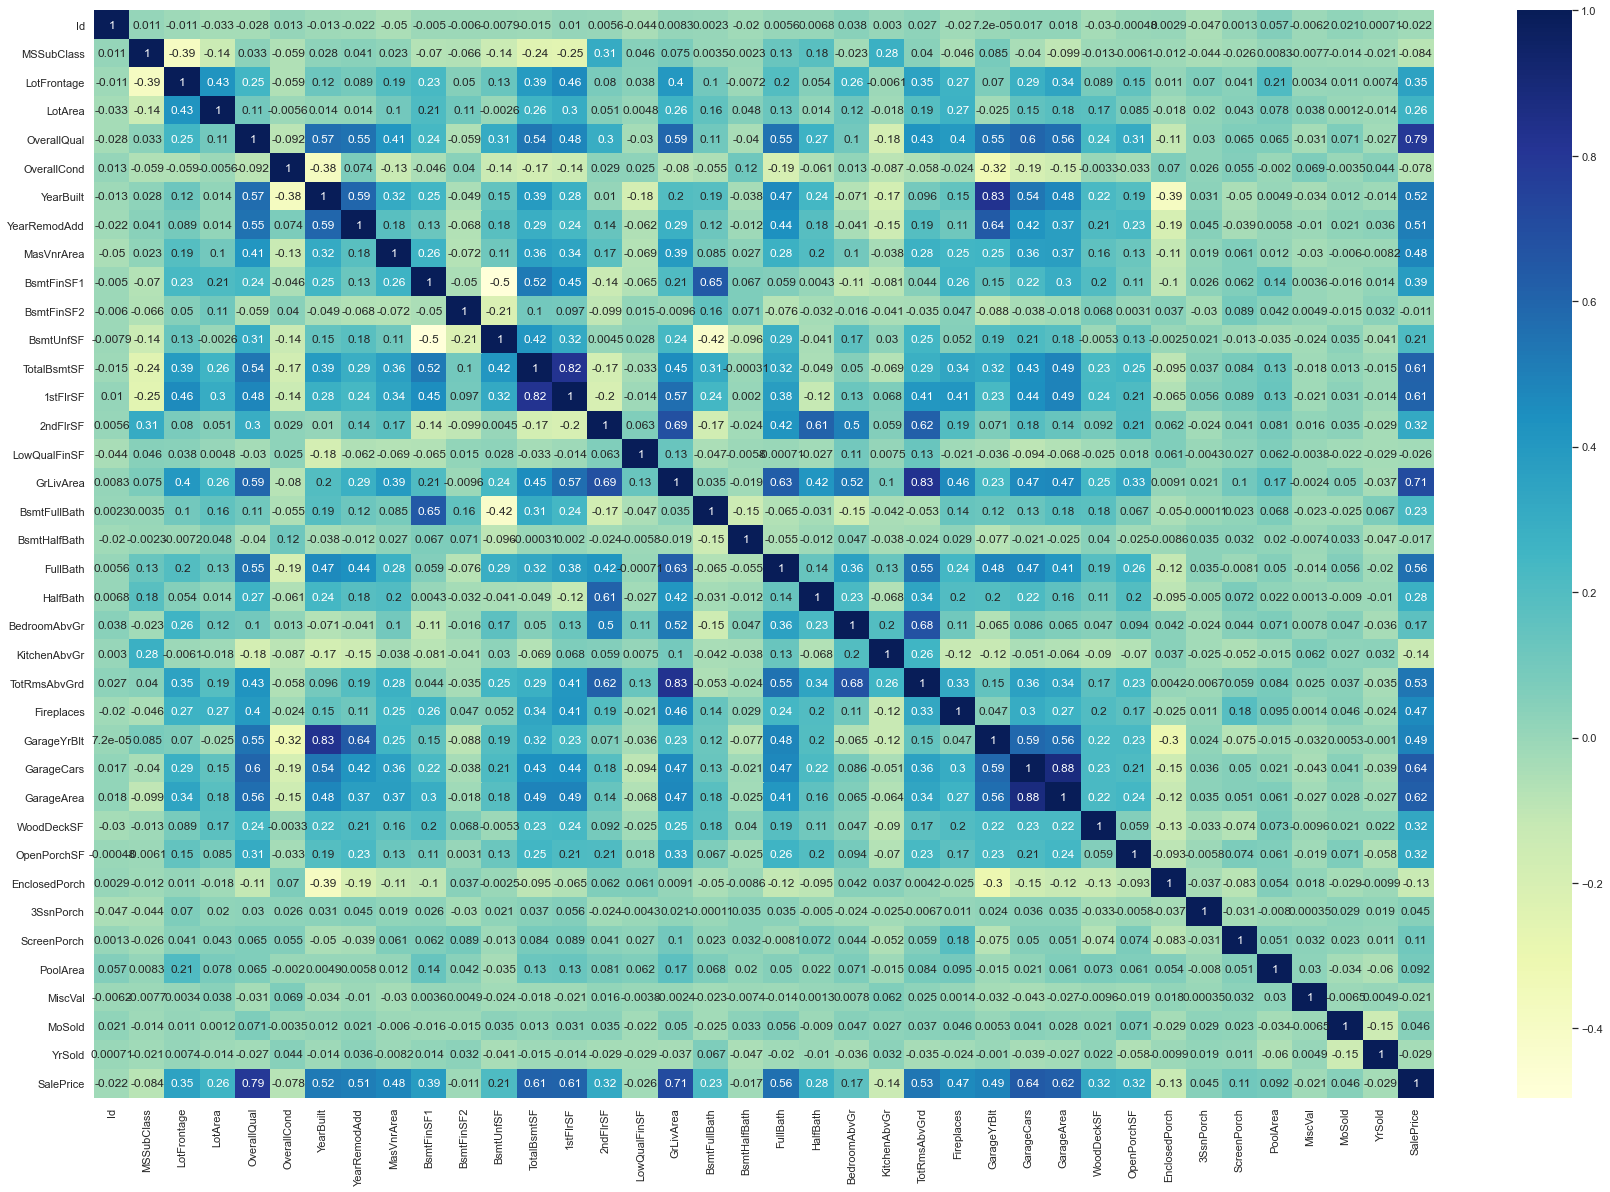

In [11]:
plt.figure(figsize=(30,20))

cor=housing.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

As we can see some correlation,things are not very clear. So let us see salePrice correlation with top 10 variables.

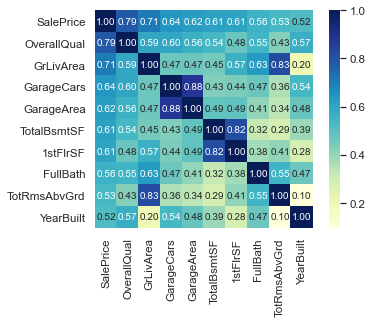

In [12]:
#saleprice correlation matrix
k = 10
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.05)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Inference -
- OverallQual and GrLivArea are highly correlated with SalePrice and is the highest. The other variables among highly correlated to SalePrice being GarageArea, TotalBasementSF, 1stFloorSF,TotalRoomsabvGrade,FullBath and YearBuilt.
- The other intercorrelated variables are:
- GarageCars and GarageArea are strongly correlated variables to each other.
- TotRmsAbvGrd and GrLivArea are correlated to each other.
- TotalBsmtSF and 1stFloor are again correlated with each other.



To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.
We can further analyse by plotting a pairplot to check the correlation - 


As we saw few variables are highly correlated to `SalesPrice`. Let us look at their pairplot

In [13]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
housing['Id'].dtype

dtype('int64')

In [15]:
# dropping Id  
housing_numeric = housing_numeric.drop(['Id'], axis=1)
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# correlation matrix
cor = housing_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

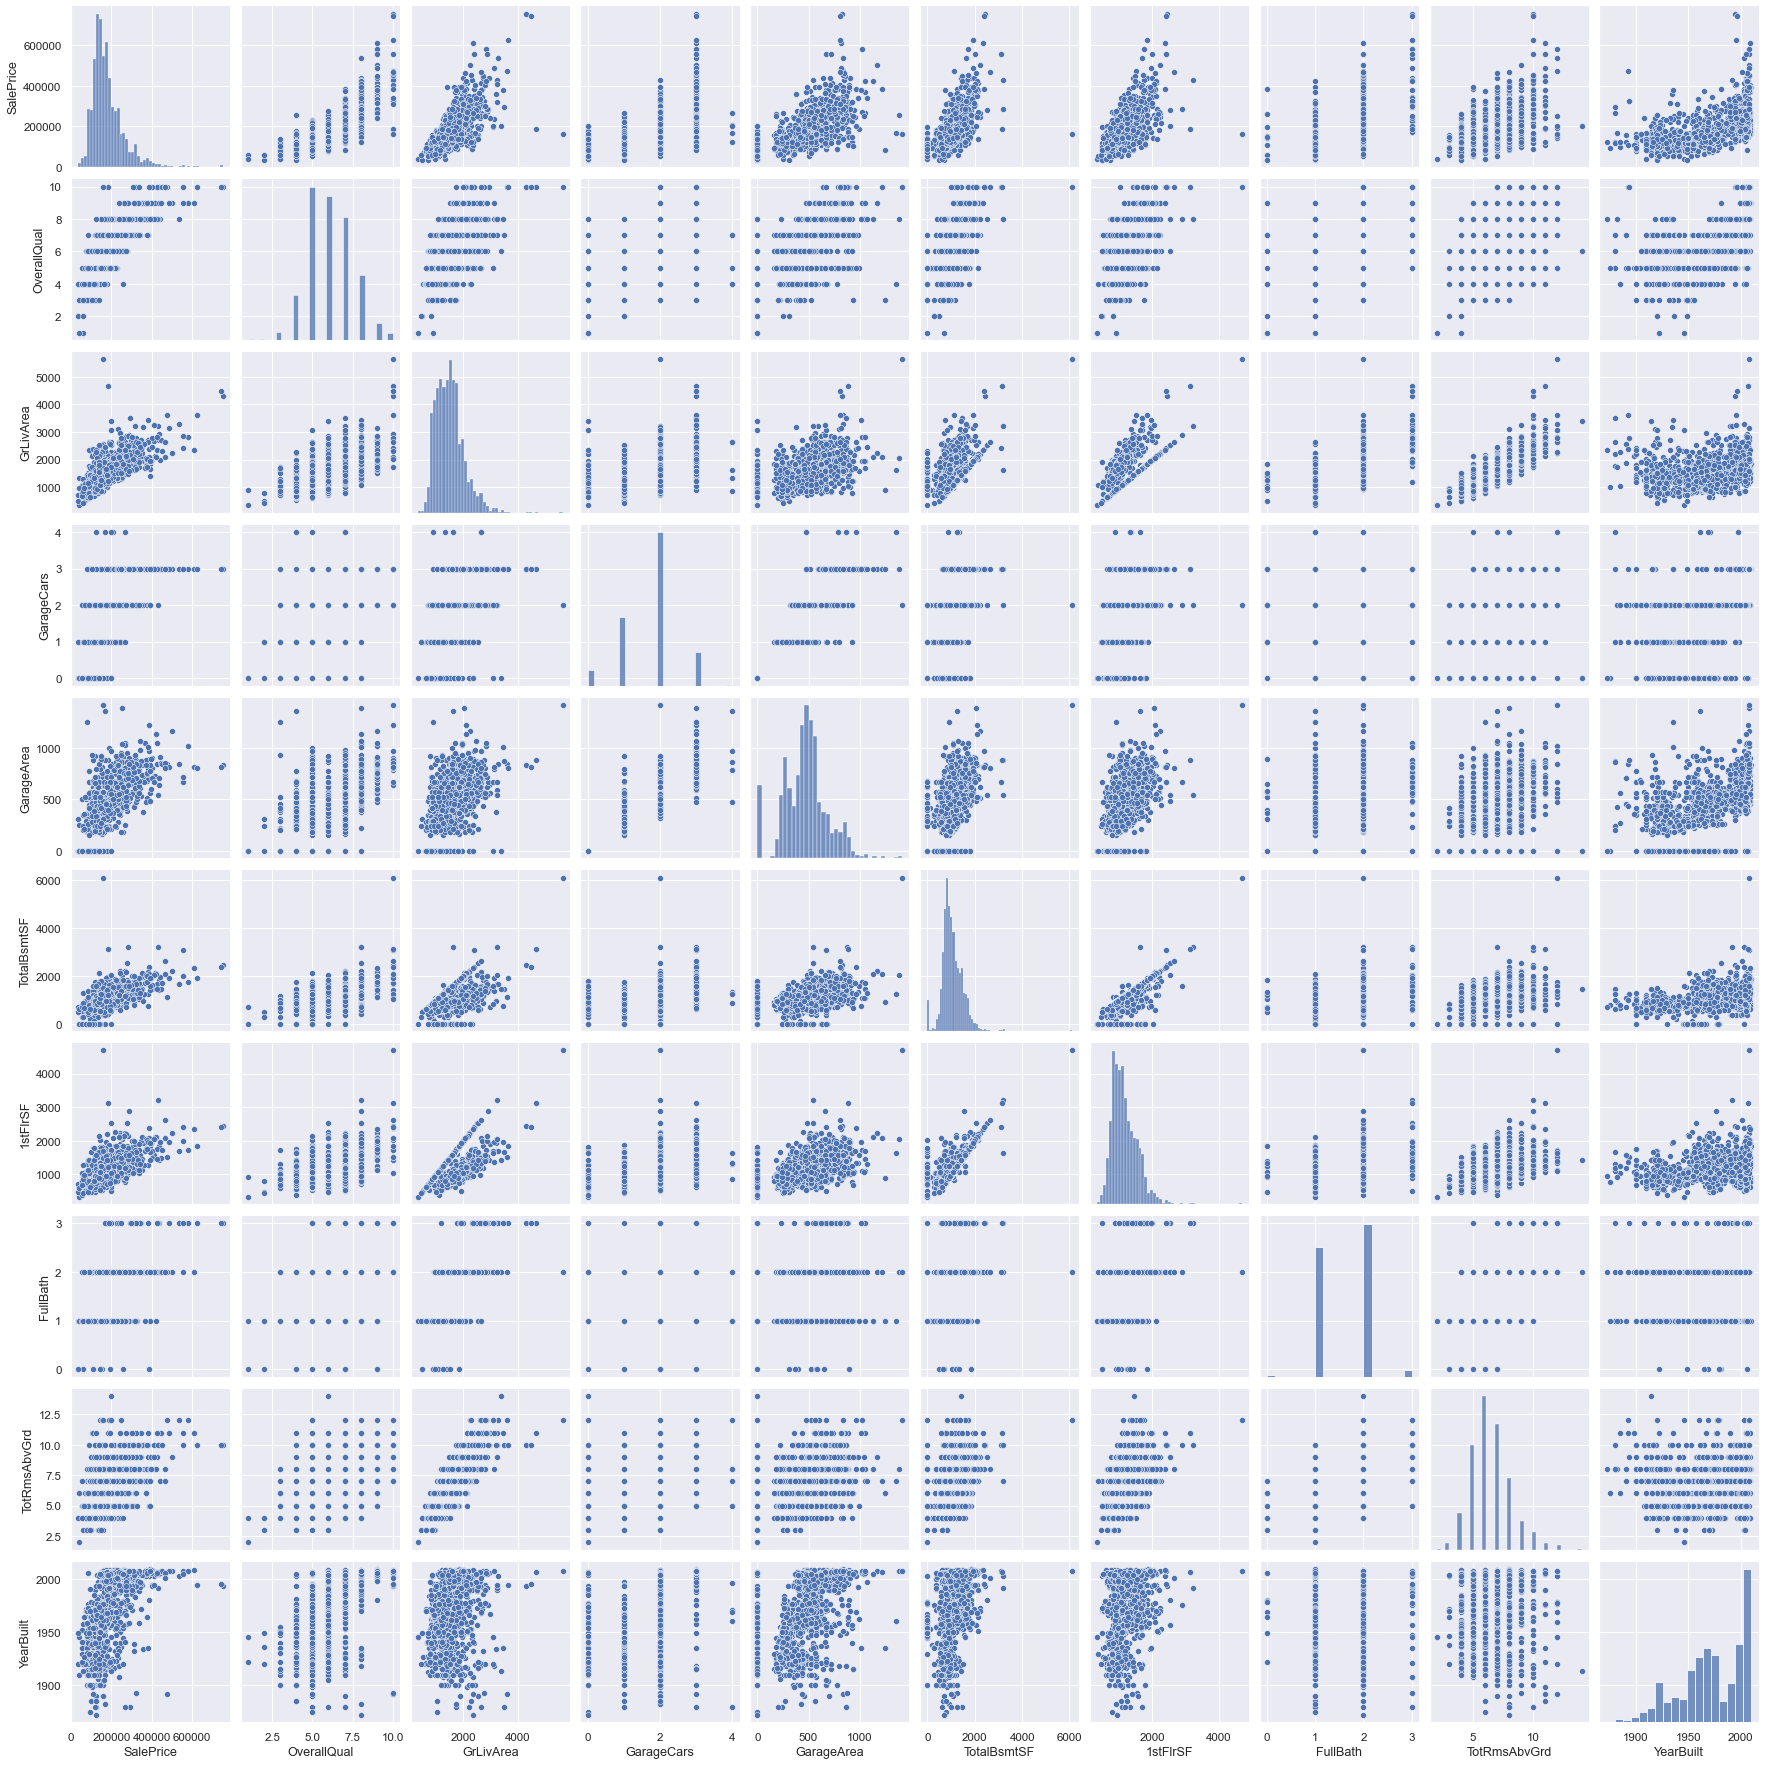

In [17]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath',
           'TotRmsAbvGrd','YearBuilt']
sns.pairplot(housing[columns], height = 2.5)
plt.show()

'GrLivArea','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath','YearBuilt' are lineraly related to `SalePrice`.
However there is high collinearity as well among variables.For instance we saw that TotalBsmtSF and 1stFloor are highly correlated with each other and we will be either of the variable further.

### 2.Data cleaning and exploration- 
Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format.

In [18]:
# variable formats
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
housing.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
#checking for duplicates
housing.duplicated(subset = ['Id'], keep = False).sum()

0

In [21]:
# checking if any of the column has single value
unique = housing.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

In [22]:
#Lets check % of null values and try to eliminate the columns which has more null values
round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

In [23]:
numeric_columns = housing.select_dtypes(exclude = 'object').columns.tolist()

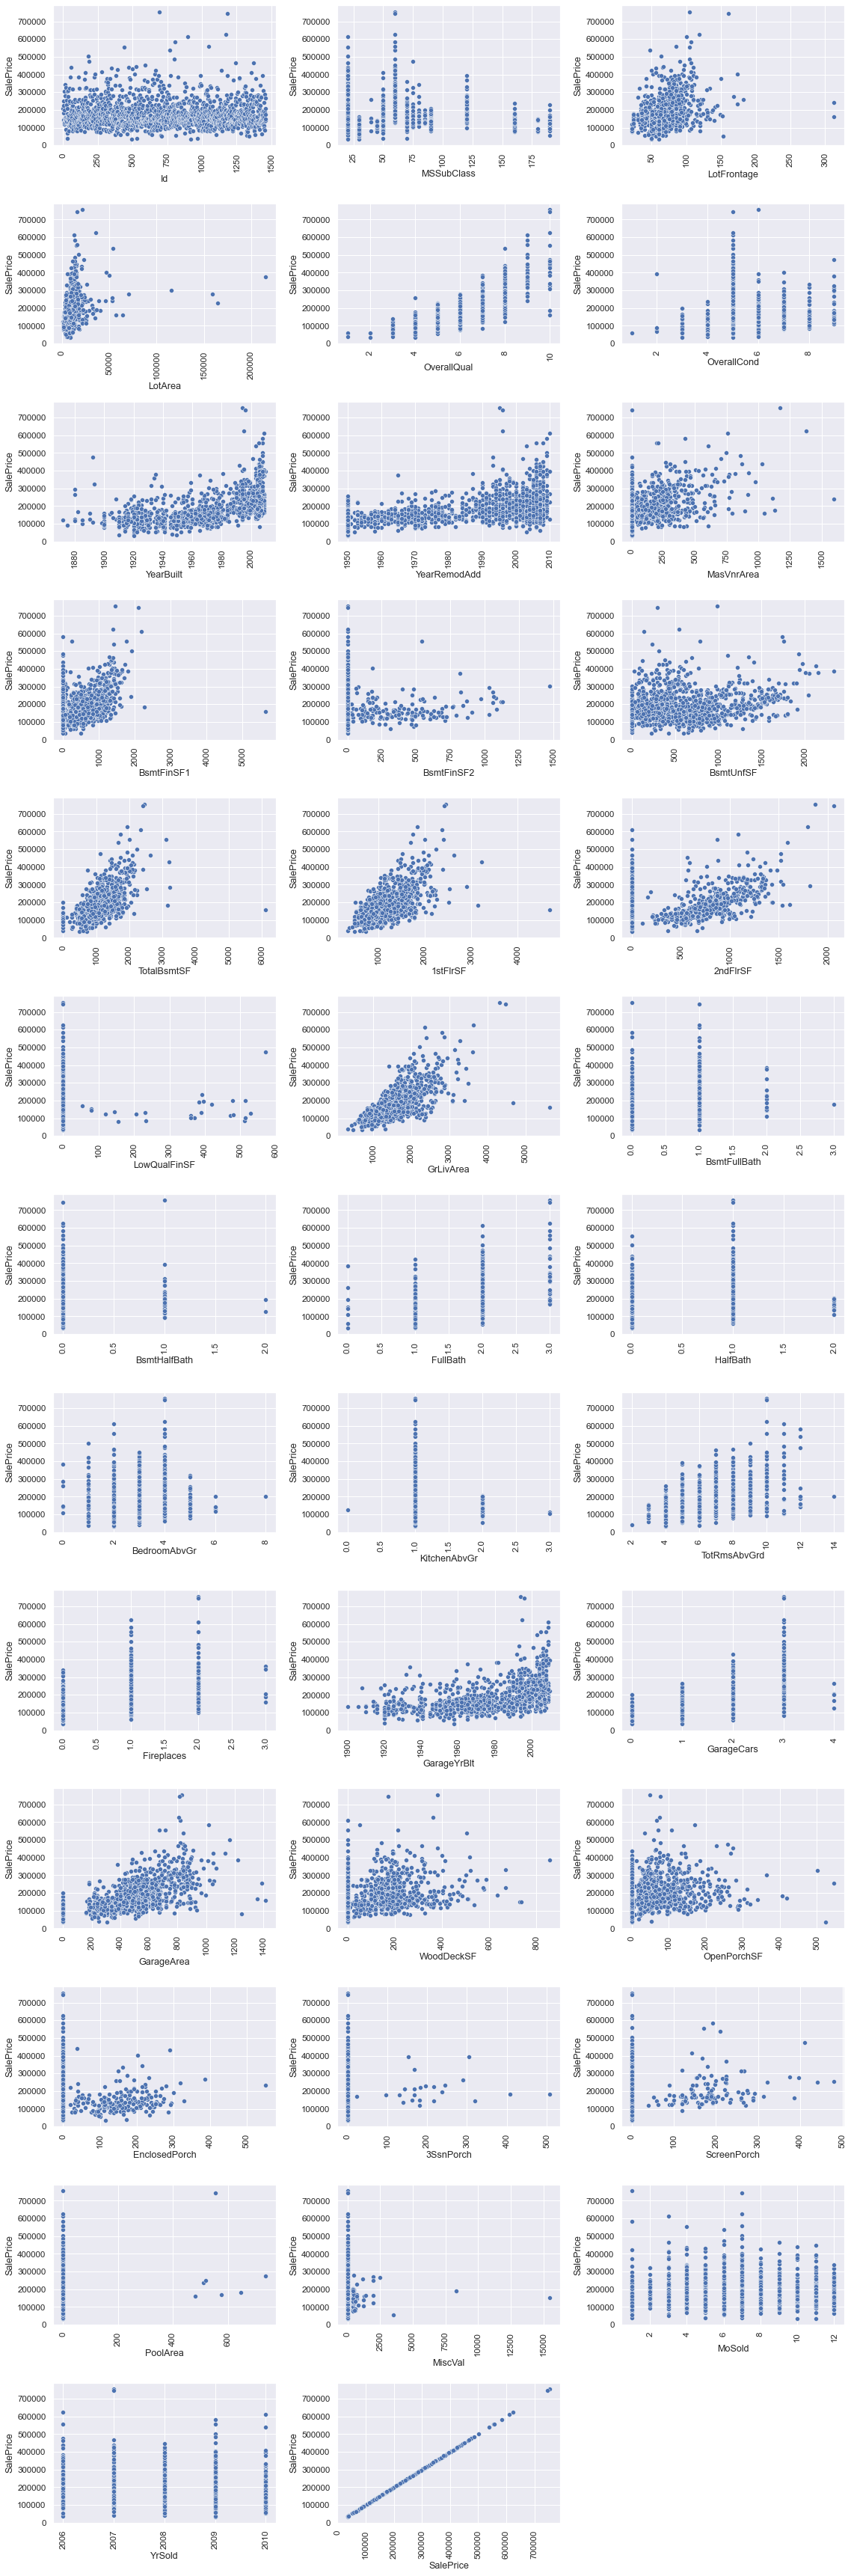

In [24]:
plt.figure(figsize = (16,48))
i = 1
for x in numeric_columns :
    plt.subplot(len(numeric_columns)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

### 3.NULL value treatment -

#### PoolQC

In [25]:
housing.PoolQC = housing.PoolQC.replace(np.nan,'NA')

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

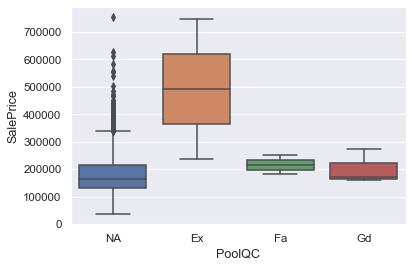

In [26]:
sns.boxplot(y = 'SalePrice',x='PoolQC',data = housing)

Inference- We can see that having a pool raises the sale price, we have very small amount of data of houses with pool available. So we can safely drop this column.

#### MiscFeature

In [27]:
housing.MiscFeature = housing.MiscFeature.replace(np.nan,'NA')

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

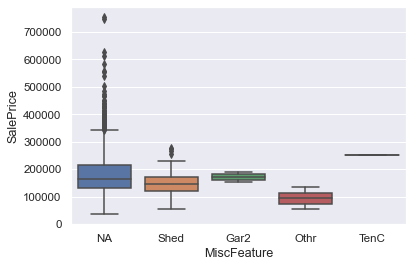

In [28]:
sns.boxplot(y = 'SalePrice',x='MiscFeature',data = housing)

Inference-There is no significant change in SalePrice. So we can safely drop this column.

#### Alley

In [29]:
housing.Alley = housing.Alley.replace(np.nan,'NA')

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

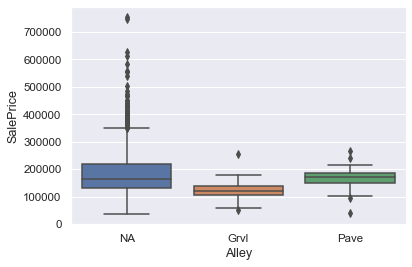

In [30]:
sns.boxplot(y = 'SalePrice',x='Alley',data = housing)

Inference-There is no significant change in SalePrice. Hence we can safely drop this column.

#### Fence

In [31]:
housing.Fence = housing.Fence.replace(np.nan,'NA')

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

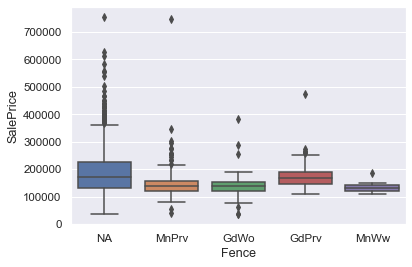

In [32]:
sns.boxplot(y = 'SalePrice',x='Fence',data = housing)

Inference -We see that there is no significant change in SalePrice. So we can safely drop this column.

#### FireplaceQu

In [33]:
housing.FireplaceQu = housing.FireplaceQu.replace(np.nan,'NA')

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

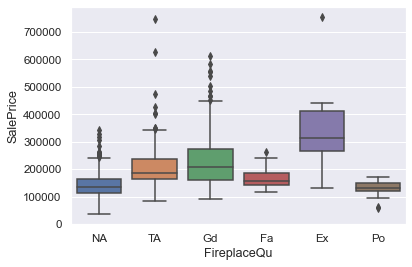

In [34]:
sns.boxplot(y = 'SalePrice',x='FireplaceQu',data = housing)

Inference-There is no significant change in SalePrice. So we can safely drop this column.

In [35]:
housing.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [36]:
# Let us eliminate columns all the above discussed columns which is having more than 30% nullvalues.
housing = housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis =1)

#### Electrical

In [37]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
housing['Electrical'].isnull().sum()

1

In [39]:
#There is only one row , so we are dropping it 
housing = housing[~(pd.isnull(housing['Electrical']))]

#### LotFrontage

In [40]:
# Let us inspect 'LotFrontage' column
housing['LotFrontage'].value_counts().head(10)

60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
65.0     44
85.0     40
78.0     25
21.0     23
90.0     23
Name: LotFrontage, dtype: int64

In [41]:
housing['LotFrontage'].isnull().sum()

259

In [42]:
housing['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Inference-As there are 259 nulls values, let us impute the nulls values by - median value. And as LotFrontage is Linear feet of street connected to property. Hence it can be safely assumed that the houses in the same neighbour hood will have similar LotFrontage. There imputing the null values based on the neighbour hood of the house.

In [43]:
housing.LotFrontage = housing.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))

#### Garage Variables

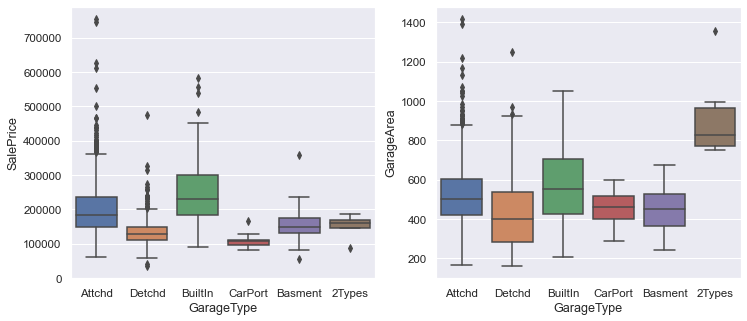

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageType',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageType',data = housing)
plt.show()

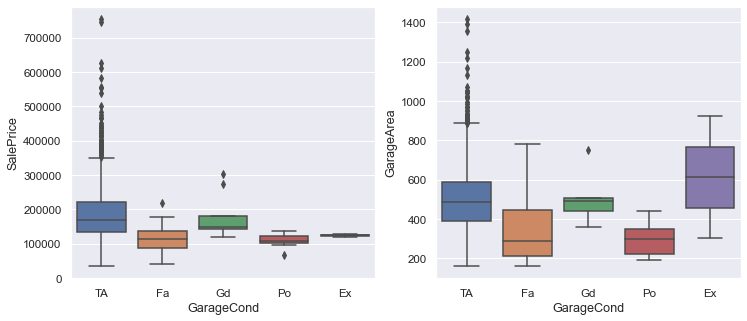

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageCond',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageCond',data = housing)
plt.show()

In [46]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    351
Name: GarageFinish, dtype: int64

In [47]:
housing['GarageFinish'].isnull().sum()

81

In [48]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
housing['GarageCond'].value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [50]:
housing['GarageQual'].value_counts()

TA    1310
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

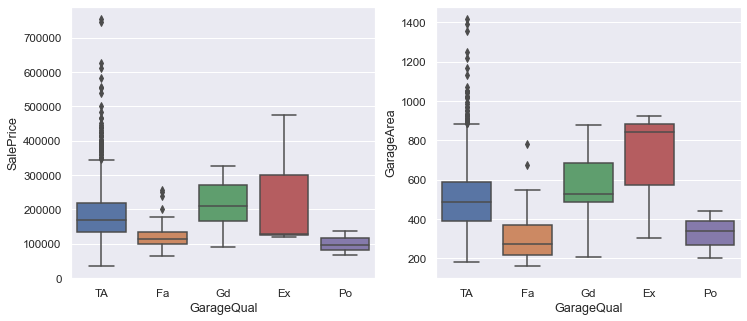

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageQual',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageQual',data = housing)
plt.show()

In [52]:
housing['GarageYrBlt'].value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    48
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
Name: GarageYrBlt, dtype: int64

On reading the data description of these variables we see that there is option called NA(Not applicable) - which means No Garage. So let us replace our null values with 'NoGarage'. And GarageYrBlt - with 0.0 as there is no garage.

In [53]:
housing['GarageType'] = housing['GarageType'].replace(np.NaN, 'NoGarage')
housing['GarageYrBlt'] = housing['GarageYrBlt'].replace(np.NaN, 0.0)
housing['GarageFinish'] = housing['GarageFinish'].replace(np.NaN, 'NoGarage')
housing['GarageCond'] = housing['GarageCond'].replace(np.NaN, 'NoGarage')
housing['GarageQual'] = housing['GarageQual'].replace(np.NaN, 'NoGarage')

#### Basement Variable

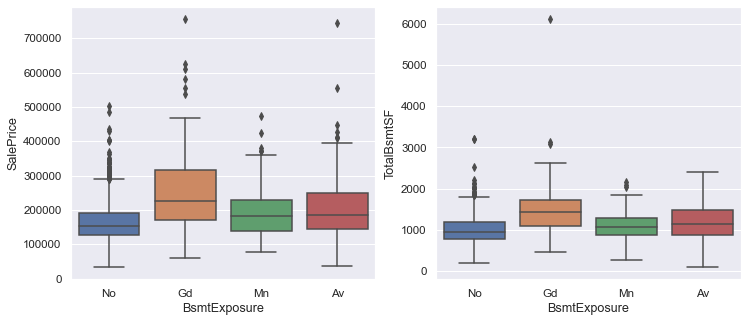

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtExposure',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtExposure',data = housing)
plt.show()

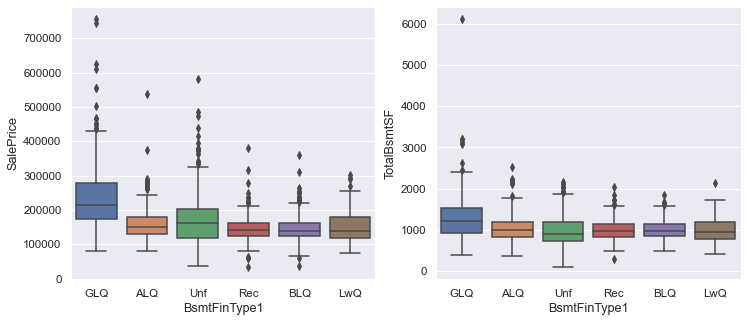

In [55]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtFinType1',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtFinType1',data = housing)
plt.show()

In [56]:
housing['BsmtFinType2'].value_counts()

Unf    1255
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [57]:
housing['BsmtExposure'].value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [58]:
housing['BsmtFinType1'].value_counts()

Unf    429
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [59]:
housing['BsmtCond'].value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [60]:
housing['BsmtQual'].value_counts()

TA    649
Gd    617
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

On reading the data description of these variables we see that there is option called NA(Not applicable) - which means No Basement. So let us replace our null values with 'NoBasement'.

In [61]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.NaN, 'NoBasement')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.NaN, 'NoBasement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.NaN, 'NoBasement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.NaN, 'NoBasement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.NaN, 'NoBasement')

#### Masonry veneer variables

In [62]:
housing['MasVnrType'].value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [63]:
housing['MasVnrArea'].value_counts().head(10)

0.0      860
72.0       8
180.0      8
108.0      8
120.0      7
16.0       7
80.0       6
200.0      6
106.0      6
340.0      6
Name: MasVnrArea, dtype: int64

In [64]:
housing['MasVnrArea'] = housing['MasVnrArea'].replace(np.NaN, 0.0)
housing['MasVnrType'] = housing['MasVnrType'].replace(np.NaN, 'None')

#### Final recheck after handling the null values:

In [65]:
# Final rechecking for null values
round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending = False)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Id              0.0
Length: 76, dtype: float64

In [66]:
housing.shape

(1459, 76)

### 4.Feature Engineering -
Adding a few more attributes. 

In [67]:
# Impute the null values with median values for LotFrontage 

housing['LotFrontage'] = housing['LotFrontage'].replace(np.nan, housing['LotFrontage'].median())
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further beloW
housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [68]:
housing.set_index('Id',inplace = True)

In [69]:
housing[housing.YrSold < housing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,
524,2007,2008,2007


As we see YearBuilt and YearSold are happening in the same year. We can remove this row as the price of the house doesn't reflect the present house.

In [70]:
housing.drop(524,inplace = True)

In [71]:
housing[housing.YrSold < housing.YearRemodAdd][['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
Id,,,


In [72]:
#Let us check few other columns
housing['ExterQual'].value_counts()

TA    905
Gd    488
Ex     51
Fa     14
Name: ExterQual, dtype: int64

If we see certain columns have ordinal categorical value. So let us map these values to numeric value.

In [73]:
housing['ExterQual'] = housing['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['ExterCond'] = housing['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
housing['BsmtCond'] = housing['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoBasement':0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NoBasement':0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBasement':0})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['CentralAir'] = housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
housing['GarageQual'] = housing['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
housing['GarageCond'] = housing['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NoGarage':0})
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NoGarage':0})

In [74]:
# Create a new column for Remodelling  named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def RemodelCheck(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing['IsRemodelled'] = housing.apply(RemodelCheck, axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0


In [75]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def RemodelledorBuiltAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing['BuiltOrRemodelAge'] = housing.apply(RemodelledorBuiltAge, axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,6
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,36
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,8


In [76]:
# Create a new column which would indicate if the Garage is old or new.
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.
# Garage Yr Built less than year 2000 will be considered as old (0) else new(1). 


def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing['OldOrNewGarage'] = housing['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,Attchd,2003,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,5,1
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,Attchd,1976,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,31,0
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,Attchd,2001,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,6,1
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,Detchd,1998,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,36,0
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,Attchd,2000,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,8,1


In [77]:
housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis = 1,inplace = True)

#### Inspecting few more columns:

In [78]:
housing.Utilities.value_counts()

AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64

In [79]:
#there is only a one building with Utilities other than All Public Utilities, therefore dropping the column
housing.drop('Utilities',axis = 1,inplace = True)

In [80]:
housing.PoolArea.value_counts()

0      1451
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [81]:
#since there is no  much variance dropping this column.
housing.drop('PoolArea',axis = 1,inplace = True)

In [82]:
housing['3SsnPorch'].value_counts()

0      1434
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [83]:
#Again as there is no  much variance dropping this column.
housing.drop('3SsnPorch',axis = 1,inplace = True)

In [84]:
housing.MiscVal.value_counts()

0        1406
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [85]:
#Again as there is no  much variance dropping this column.
housing.drop('MiscVal',axis = 1,inplace = True)

In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1458 non-null   int64  
 1   MSZoning           1458 non-null   object 
 2   LotFrontage        1458 non-null   float64
 3   LotArea            1458 non-null   int64  
 4   Street             1458 non-null   object 
 5   LotShape           1458 non-null   object 
 6   LandContour        1458 non-null   object 
 7   LotConfig          1458 non-null   object 
 8   LandSlope          1458 non-null   object 
 9   Neighborhood       1458 non-null   object 
 10  Condition1         1458 non-null   object 
 11  Condition2         1458 non-null   object 
 12  BldgType           1458 non-null   object 
 13  HouseStyle         1458 non-null   object 
 14  OverallQual        1458 non-null   int64  
 15  OverallCond        1458 non-null   int64  
 16  RoofStyle          1458 

In [87]:
categorical_columns = housing.select_dtypes(include = 'object').columns.tolist()

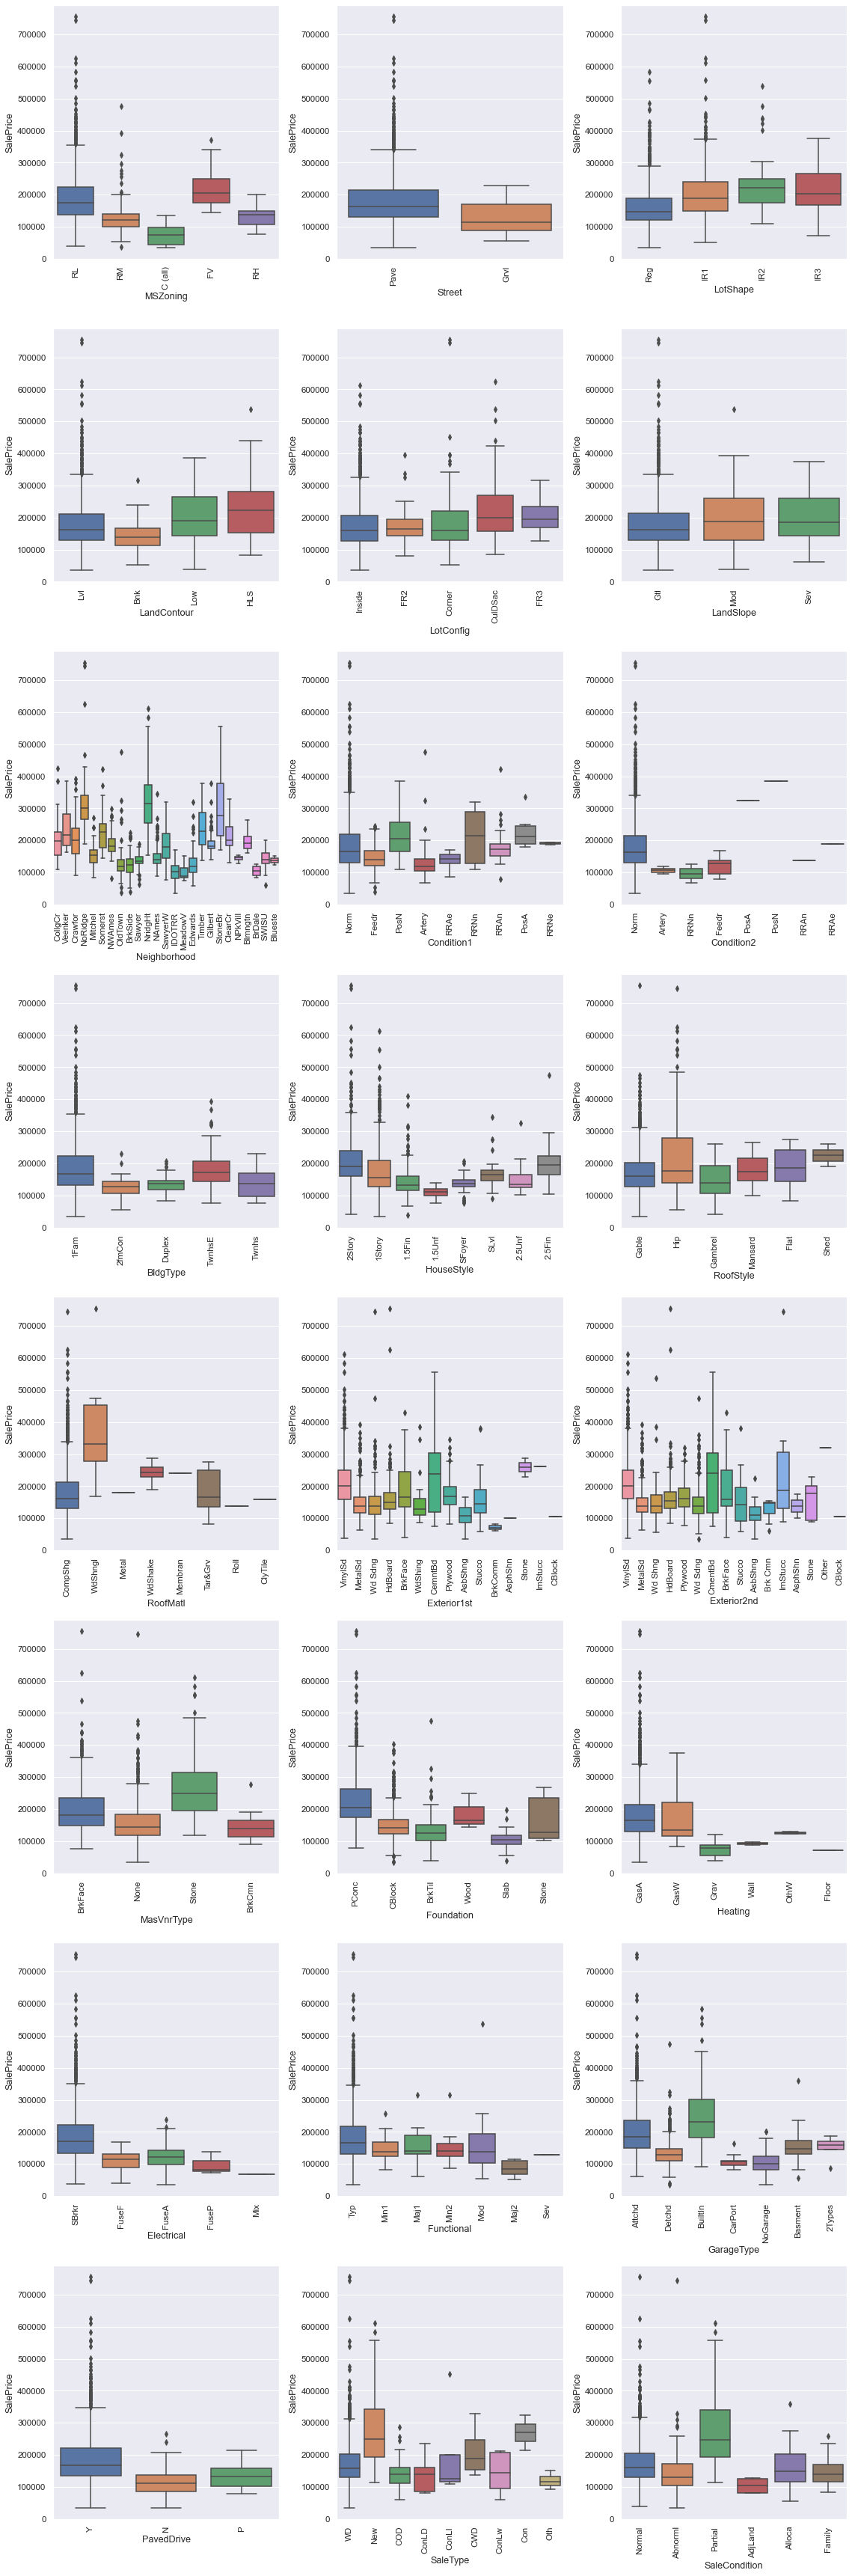

In [88]:
plt.figure(figsize = (16,48))
i = 1
for x in categorical_columns:
    plt.subplot(len(categorical_columns)//3,3,i)
    sns.boxplot(y='SalePrice',x=x,data=housing)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

#### Overallquality

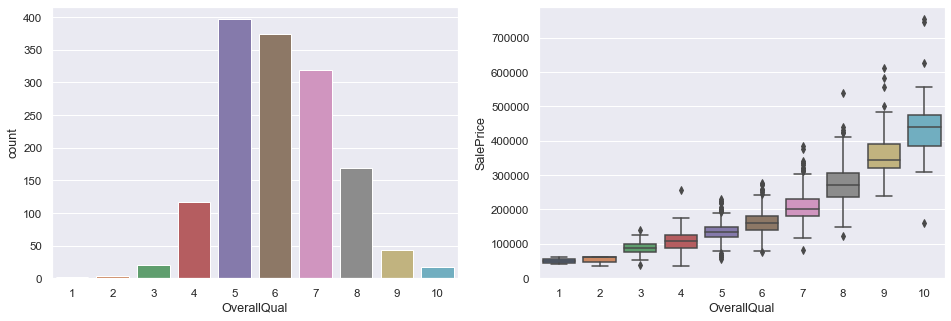

In [89]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.countplot(housing.OverallQual)
plt.subplot(1,2,2)
sns.boxplot(y='SalePrice',x='OverallQual',data = housing)
plt.show()

### 5. Handling outliers Treatment-

In [90]:
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.879287,70.156722,10497.078189,6.097394,5.576132,102.735940,3.395062,3.083676,3.487654,2.934842,1.628944,3.545953,442.698217,1.247599,46.613169,567.152949,1056.464335,4.144719,0.934842,1161.552126,345.974623,5.852538,1513.379287,0.425240,0.057613,1.563786,0.38203,2.866255,1.046639,3.510288,6.514403,0.613169,1.713992,1.766118,472.748285,2.810014,2.808642,94.162551,46.445816,21.984225,15.081619,6.320302,180927.775034,0.475995,22.981481,0.274348
std,42.325185,22.392394,9957.970488,1.379866,1.113359,180.009066,0.573041,0.351281,0.876083,0.552532,1.066189,2.107186,453.773839,0.892898,161.420729,442.069094,435.250893,0.959890,0.246889,383.224862,435.643333,48.655960,519.267115,0.518929,0.238907,0.549891,0.50271,0.816323,0.220483,0.662945,1.622211,0.644829,0.892174,0.747104,213.671713,0.723360,0.720144,125.389262,65.618007,61.155666,55.792877,2.703542,79496.167760,0.499595,20.637248,0.446338
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3303.100000,4.000000,4.000000,0.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,520.000000,3.000000,0.000000,672.850000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,88000.000000,0.000000,0.000000,0.000000
10%,20.000000,48.000000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,74.700000,637.000000,3.000000,1.000000,757.000000,0.000000,0.000000,912.000000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,106425.000000,0.000000,1.000000,0.000000
25%,20.000000,60.000000,7544.500000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,796.000000,3.000000,1.000000,882.000000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.00000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,331.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129925.000000,0.000000,4.000000,0.000000
50%,50.000000,70.000000,9475.000000,6.000000,5.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.00000,3.000000,1.0000

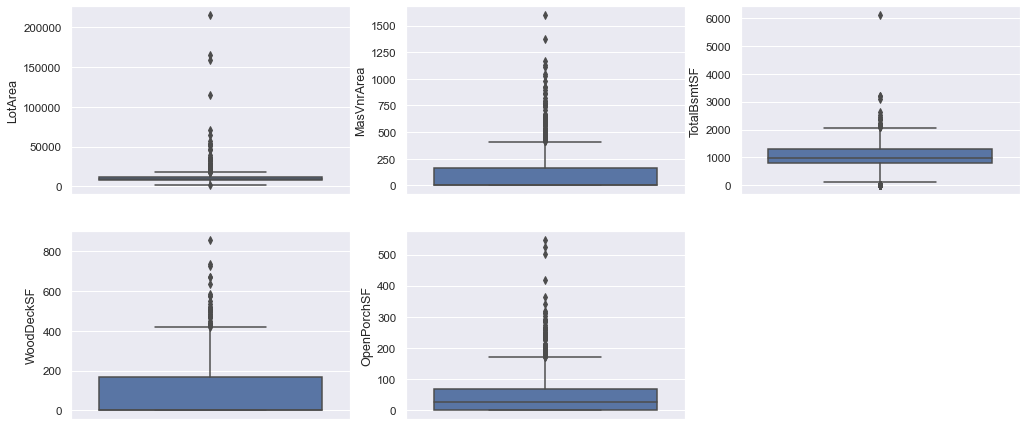

In [91]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', data = housing)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = housing)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = housing)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = housing)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = housing)
plt.show()

In [92]:
q3 = housing['LotArea'].quantile(0.99)
housing = housing[housing.LotArea <= q3]

In [93]:
q3 = housing['MasVnrArea'].quantile(0.99)
housing = housing[housing.MasVnrArea <= q3]

In [94]:
# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housing['TotalBsmtSF'].quantile(0.99)
housing = housing[housing["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housing['WoodDeckSF'].quantile(0.99)
housing= housing[housing["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housing['OpenPorchSF'].quantile(0.99)
housing = housing[housing["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [95]:
# Determine the percentage of data retained

num_data = round(100*(len(housing)/1460),2)
print(num_data)

94.79


In [96]:
housing.shape

(1384, 70)

In [97]:
# final recheck again
housing.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,57.062861,69.414017,9638.575867,6.040462,5.582370,88.466763,3.374277,3.080202,3.460983,2.929191,1.592486,3.511561,423.183526,1.236272,43.944364,558.315751,1025.443642,4.141618,0.935694,1135.830925,337.008671,6.165462,1479.005058,0.414017,0.057081,1.546965,0.373555,2.855491,1.048410,3.492052,6.446532,0.586705,1.690029,1.742052,465.301301,2.803468,2.801301,86.138006,42.151012,22.677746,14.344653,6.328757,175163.551301,0.475434,23.172688,0.276012
std,42.376830,21.187799,4069.284004,1.330909,1.119281,142.977804,0.552470,0.348634,0.875427,0.563445,1.036626,2.109753,415.342681,0.877838,155.224253,431.453949,382.032866,0.958368,0.245387,346.583714,423.610609,49.921378,474.313014,0.511451,0.238231,0.541113,0.501532,0.809871,0.224585,0.650887,1.576225,0.630392,0.884519,0.742722,210.033219,0.730764,0.728690,110.322320,56.342059,62.026330,53.717362,2.710070,69803.098218,0.499577,20.766646,0.447184
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35311.000000,0.000000,0.000000,0.000000
5%,20.000000,35.000000,3196.000000,4.000000,4.000000,0.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,487.850000,3.000000,0.000000,672.000000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,87575.000000,0.000000,0.000000,0.000000
10%,20.000000,47.300000,5000.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,70.000000,630.000000,3.000000,1.000000,756.000000,0.000000,0.000000,904.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,240.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,105150.000000,0.000000,1.000000,0.000000
25%,20.000000,60.000000,7493.000000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,217.750000,790.500000,3.000000,1.000000,872.000000,0.000000,0.000000,1120.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,1.000000,1.000000,312.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129000.000000,0.000000,4.000000,0.000000
50%,50.000000,70.000000,9317.000000,6.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,374.500000,1.000000,0.000000,474.000000,975.500000,5.000000,1.000000,1072.000000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,

### 6.Testing the Skewness of SalePrice-

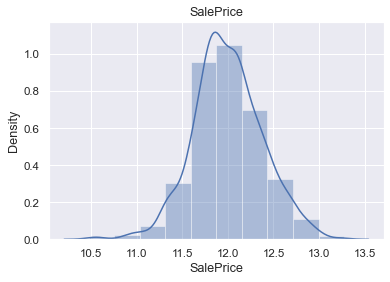

In [98]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing['SalePrice'] = np.log1p(housing['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=10)
plt.show()

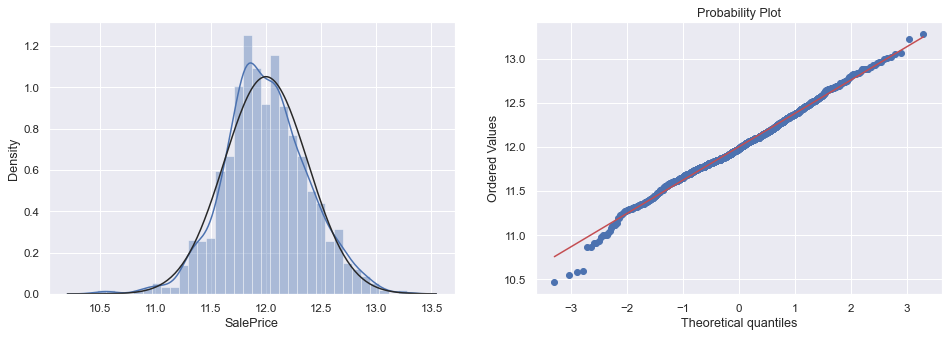

In [99]:
from scipy.stats import norm
from scipy.stats import probplot
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

In [100]:
print('Skewness:',housing.SalePrice.skew())
print('Kurtosis:',housing.SalePrice.kurt())

Skewness: -0.007448972927742718
Kurtosis: 0.5561508091484857


In [101]:
#applying log transformation
housing['SalePrice'] = np.log(housing['SalePrice'])

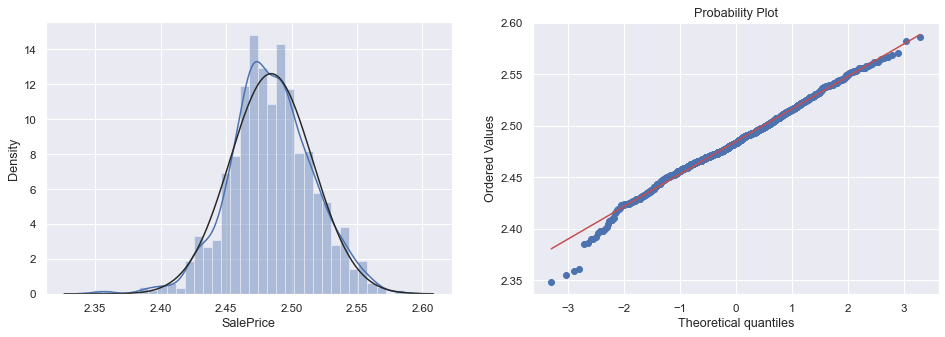

In [102]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

In [103]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'SaleType', '

### 7. Data Preparation
- Converting categorical data into numercal data
- Creating Dummies

In [104]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition','BuiltOrRemodelAge','IsRemodelled','OldOrNewGarage'
       ]]

y = housing['SalePrice']

In [105]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
4,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal


In [106]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [107]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [108]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [109]:
X.shape

(1384, 193)

In [110]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=193)

In [111]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### 8. Model Building and Evaluation

### RFE:

In [112]:
lm = LinearRegression()

In [113]:
#Lets use RFE to select highly important 50 features

rfe = RFE(lm, 50)             # running RFE with 50 variables as output
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 104),
 ('LotFrontage', False, 120),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 138),
 ('ExterQual', False, 101),
 ('ExterCond', False, 22),
 ('BsmtQual', False, 74),
 ('BsmtCond', False, 75),
 ('BsmtExposure', False, 11),
 ('BsmtFinType1', False, 45),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 47),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 3),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 60),
 ('FullBath', False, 64),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 97),
 ('KitchenAbvGr', False, 49),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 65),
 ('Fireplaces', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', False,

In [115]:
col50 = X_train.columns[rfe.support_]
col50

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'BuiltOrRemodelAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Condition1_Norm',
       'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'Functional_Typ', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_NoGarage', 'PavedDrive_Y', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

### Ridge Regression

In [116]:
X_train_final = X_train[col50]

In [117]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004155,0.003591,0.003198,0.003917,0.0001,{'alpha': 0.0001},-0.006850,-0.006492,-0.007017,-0.006673,-0.006769,-0.00676,0.000175,24,-0.006089,-0.006334,-0.006252,-0.006271,-0.00619,-0.006227,0.000083
1,0.004207,0.003842,0.003417,0.004200,0.001,{'alpha': 0.001},-0.006850,-0.006492,-0.007016,-0.006673,-0.006769,-0.00676,0.000175,23,-0.006089,-0.006334,-0.006252,-0.006271,-0.00619,-0.006227,0.000083
2,0.005018,0.004114,0.005007,0.004092,0.01,{'alpha': 0.01},-0.006850,-0.006492,-0.007016,-0.006673,-0.006769,-0.00676,0.000175,22,-0.006089,-0.006334,-0.006252,-0.006271,-0.00619,-0.006227,0.000083
3,0.004400,0.003224,0.007373,0.004012,0.05,{'alpha': 0.05},-0.006849,-0.006492,-0.007016,-0.006673,-0.006769,-0.00676,0.000175,21,-0.006089,-0.006334,-0.006253,-0.006271,-0.00619,-0.006227,0.000083
4,0.006385,0.003657,0.003207,0.003928,0.1,{'alpha': 0.1},-0.006849,-0.006492,-0.007015,-0.006674,-0.006770,-0.00676,0.000175,20,-0.006090,-0.006334,-0.006253,-0.006272,-0.00619,-0.006228,0.000083


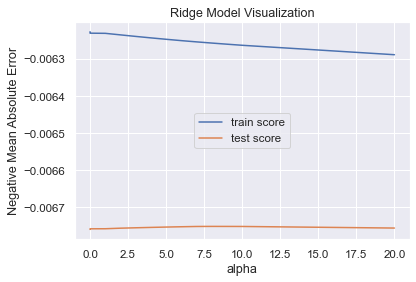

In [119]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Ridge Model Visualization")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [120]:
# get the best estimator for lambda
model_cv.best_estimator_

Ridge(alpha=8.0)

In [121]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 1.88956143e-03,  7.28728074e-03,  2.98350601e-03,  2.70129116e-03,
        5.35139286e-04,  3.96862878e-04,  3.60245489e-03,  1.33079500e-03,
        2.91548413e-03,  3.71208290e-03,  4.98127999e-05,  5.45088088e-03,
        1.15961554e-03,  1.83468805e-03,  1.39901339e-03,  1.16038279e-03,
        1.37497691e-03,  1.70054706e-03,  1.42679467e-03,  1.18579638e-03,
       -2.18442924e-03,  2.58951523e-03,  1.67268758e-03,  3.89027203e-03,
        8.97783099e-04,  1.34845148e-03,  1.13829846e-03, -1.85582424e-03,
       -1.23688731e-03, -2.30369876e-03,  1.09620025e-03,  2.00269572e-03,
        1.45383968e-03,  1.46428676e-03,  1.18330575e-03,  2.33520819e-03,
        7.76890181e-05,  1.30113477e-04, -7.13743807e-04,  8.67621896e-05,
        4.35485785e-04,  1.37934249e-03,  3.70408408e-03,  7.86277966e-04,
        1.95343701e-03,  2.41096546e-03,  2.57230070e-03,  1.22751172e-03,
        1.93665200e-03,  3.36053626e-03])

In [122]:
Y_train_ridge = y_train.copy()

In [123]:
from sklearn.metrics import r2_score
model_ridge=ridge.fit(X_train_final, Y_train_ridge)
# predict
y_train_pred = ridge.predict(X_train_final)
print(model_ridge.score(X_train_final, Y_train_ridge))
print(r2_score(y_true=Y_train_ridge, y_pred=y_train_pred))

0.9195259663712729
0.9195259663712729


In [130]:
X_test_ridge = X_test[col50]
Y_test_ridge = y_test.copy()

In [131]:
y_test_pred = ridge.predict(X_test_ridge)
print(model_ridge.score(X_test_ridge, Y_test_ridge))
print(r2_score(y_true=Y_test_ridge, y_pred=y_test_pred))

0.8909237124644012
0.8909237124644012


Train is 91.95% and test is 89.09%

In [132]:
# Check the mean squared error

mean_squared_error(Y_test_ridge, ridge.predict(X_test_ridge))

0.00012260216779881505

In [ ]:
Regularization -Reduces the variance without substantial increase in the bias. Normally we keep the same number of features, but reduce the magnitude of the coefficients.

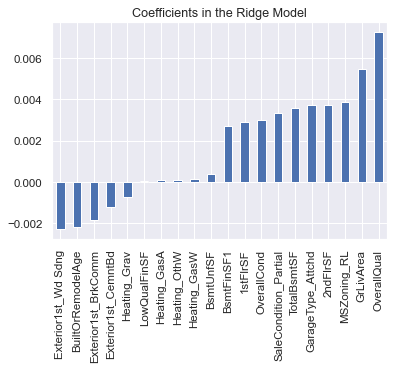

In [133]:
# Plot important coefficients - To check the magnitude of the co-efficients 

coefs = pd.Series(ridge.coef_, index = X_train_final.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")

plt.show()

Inference -OverallQual,GrLivArea  is much higher as compared to rest of the coefficients. Therefore the total salesprice would be more driven by these two features.

In [166]:
coefs.sort_values().head(10)

BuiltOrRemodelAge     -0.002575
MSZoning_RM           -0.002522
Exterior1st_BrkComm   -0.000832
MasVnrType_Stone       0.000000
MasVnrType_None       -0.000000
MasVnrType_BrkFace     0.000000
Exterior2nd_Wd Sdng   -0.000000
Exterior2nd_CmentBd    0.000000
Exterior1st_Wd Sdng   -0.000000
Exterior1st_CemntBd    0.000000
dtype: float64

In [167]:
coefs.sort_values().tail(10)

Fireplaces          0.001403
GarageFinish        0.001558
Foundation_PConc    0.001721
GarageArea          0.001852
KitchenQual         0.001946
OverallCond         0.002095
BsmtFinSF1          0.002174
TotalBsmtSF         0.003720
OverallQual         0.008549
GrLivArea           0.008858
dtype: float64

In [168]:
ridge_df = pd.DataFrame() 
ridge_df['Coeff Values'] = pd.Series(ridge.coef_) 
ridge_df['Variables'] = X_train_final.columns

# Removing rows that have coeff = 0
ridge_df = ridge_df.loc[ridge_df['Coeff Values']!=0]

ridge_df['Absolute Coefficent'] =ridge_df['Coeff Values'].apply(lambda x:abs(x))
ridge_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(ridge_df.head(20))

    Coeff Values              Variables  Absolute Coefficent
1       0.007287            OverallQual             0.007287
11      0.005451              GrLivArea             0.005451
23      0.003890            MSZoning_RL             0.003890
9       0.003712               2ndFlrSF             0.003712
42      0.003704      GarageType_Attchd             0.003704
6       0.003602            TotalBsmtSF             0.003602
49      0.003361  SaleCondition_Partial             0.003361
2       0.002984            OverallCond             0.002984
8       0.002915               1stFlrSF             0.002915
3       0.002701             BsmtFinSF1             0.002701
21      0.002590            MSZoning_FV             0.002590
46      0.002572    GarageType_NoGarage             0.002572
45      0.002411      GarageType_Detchd             0.002411
35      0.002335       Foundation_PConc             0.002335
29     -0.002304    Exterior1st_Wd Sdng             0.002304
20     -0.002184      Bu

As per Ridge regression significant(top 5) variables which effect the price of houses are

#### positively are ( increases the price):
      0.007287            OverallQual             
      0.005451              GrLivArea             
      0.003890            MSZoning_RL             
      0.003712               2ndFlrSF             
      0.003704      GarageType_Attchd
    
    GrLivArea         : Above grade (ground) living area square feet
    OverallQual       : Rates the overall material and finish of the house
    MSZoning_RL       : Zoning classification of the sale - Residential Medium Density 
    GarageType_Attchd : Garage Type-Attached to home
    2ndFlrSF          : Second floor square feet 
    
    
#### negatively are ( decreases the price):

    Exterior1st_Wd Sdng   -0.002304
    BuiltOrRemodelAge     -0.002184
    Exterior1st_BrkComm   -0.001856
    Exterior1st_CemntBd   -0.001237
    Heating_Grav          -0.000714
    
    HouseAge              : Age of the house             
    KitchenAbvGr          : Kitchens above grade        
    SaleCondition_Partial : Home was not completed when last assessed (associated with New Homes) 
    BldgType_Twnhs        : Type of dwelling -Townhouse Inside Unit and end unit
    Heating_Grav          : Type of heating - Gravity Furnace


### Lasso

In [169]:
X_train_lasso = X_train[col50]

In [170]:
lasso = Lasso()
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018193,0.012025,0.004471,0.003510,0.0001,{'alpha': 0.0001},-0.007290,-0.006233,-0.006324,-0.006447,-0.006220,-0.007633,-0.006413,-0.007079,-0.006656,-0.007435,-0.006773,0.000509,1,-0.006298,-0.006403,-0.006456,-0.006408,-0.006520,-0.006279,-0.006424,-0.006325,-0.006377,-0.006290,-0.006378,0.000075
1,0.006033,0.003986,0.003196,0.003916,0.001,{'alpha': 0.001},-0.007974,-0.006490,-0.006433,-0.007325,-0.006593,-0.008442,-0.007057,-0.007461,-0.006917,-0.007047,-0.007174,0.000617,2,-0.006781,-0.006941,-0.006982,-0.006888,-0.007002,-0.006817,-0.006947,-0.006841,-0.006903,-0.006876,-0.006898,0.000068
2,0.007718,0.002706,0.000801,0.002402,0.002,{'alpha': 0.002},-0.008973,-0.007192,-0.006929,-0.008188,-0.007156,-0.009382,-0.007740,-0.008308,-0.007222,-0.007671,-0.007876,0.000783,3,-0.007540,-0.007702,-0.007721,-0.007646,-0.007694,-0.007565,-0.007712,-0.007601,-0.007705,-0.007678,-0.007656,0.000062
3,0.006606,0.002826,0.001817,0.003513,0.003,{'alpha': 0.003},-0.009959,-0.007899,-0.007487,-0.009032,-0.007770,-0.010194,-0.008181,-0.009167,-0.007905,-0.008393,-0.008599,0.000895,4,-0.008277,-0.008477,-0.008483,-0.008431,-0.008421,-0.008294,-0.008422,-0.008350,-0.008457,-0.008412,-0.008402,0.000068
4,0.006391,0.004315,0.001631,0.003142,0.005,{'alpha': 0.005},-0.012092,-0.009403,-0.008820,-0.010720,-0.009132,-0.011831,-0.008975,-0.010802,-0.009739,-0.009991,-0.010150,0.001108,5,-0.009819,-0.010083,-0.010049,-0.010022,-0.009998,-0.009949,-0.010004,-0.009942,-0.009971,-0.010010,-0.009985,0.000069


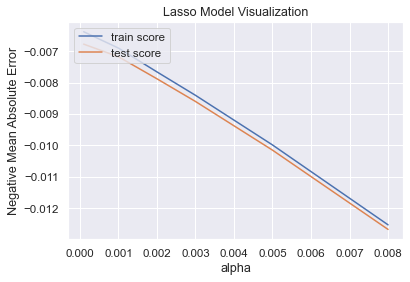

In [172]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Lasso Model Visualization")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [173]:
# get the best estimator for lambda
model_cv.best_estimator_

Lasso(alpha=0.0001)

In [174]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

Lasso(alpha=0.001)

In [175]:
(lasso.coef_)

array([ 0.00116489,  0.00854939,  0.00209503,  0.00217361,  0.        ,
       -0.        ,  0.0037204 ,  0.00105081,  0.        ,  0.        ,
       -0.        ,  0.00885838,  0.00047286,  0.00194569,  0.00140254,
        0.00155821,  0.00120886,  0.00185179,  0.        ,  0.00070065,
       -0.00257512,  0.        ,  0.        ,  0.        , -0.0025224 ,
        0.00026331,  0.0003173 , -0.0008316 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.00172111,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.00064788,  0.00067772,  0.        ,  0.        ,
       -0.        , -0.        ,  0.00085598,  0.        ,  0.00122519])

In [176]:
list(zip(X_train_lasso.columns,lasso.coef_))

[('LotArea', 0.0011648932659088576),
 ('OverallQual', 0.008549385135928093),
 ('OverallCond', 0.002095030226397352),
 ('BsmtFinSF1', 0.0021736107194957593),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0037204015736935275),
 ('CentralAir', 0.0010508103020855902),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.008858376638703626),
 ('BsmtFullBath', 0.00047285679829596586),
 ('KitchenQual', 0.001945687017606165),
 ('Fireplaces', 0.0014025373469628297),
 ('GarageFinish', 0.0015582097615586357),
 ('GarageCars', 0.0012088594953979187),
 ('GarageArea', 0.0018517909329964688),
 ('GarageQual', 0.0),
 ('WoodDeckSF', 0.0007006455927158795),
 ('BuiltOrRemodelAge', -0.0025751229176589783),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0025224026178818216),
 ('Neighborhood_Crawfor', 0.0002633064014500888),
 ('Condition1_Norm', 0.00031729798868302566),
 ('Exterior1st_BrkComm', -0.0008316024099128275),
 ('

In [177]:
Y_train_lasso = y_train.copy()

In [178]:
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

# predict
y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.9005862475631325
0.9005862475631325


In [179]:
X_test_lasso = X_test[col50]
Y_test_lasso = y_test.copy()

In [180]:
y_test_pred = lasso.predict(X_test_lasso)
print(model_lasso.score(X_test_lasso, Y_test_lasso))
print(r2_score(y_true=Y_test_lasso, y_pred=y_test_pred))

0.8736553525942199
0.8736553525942199


Train is 90.05% and test is 87.36%

In [181]:
# Check the mean squared error

mean_squared_error(Y_test_lasso, lasso.predict(X_test_lasso))

0.0001420118708813785

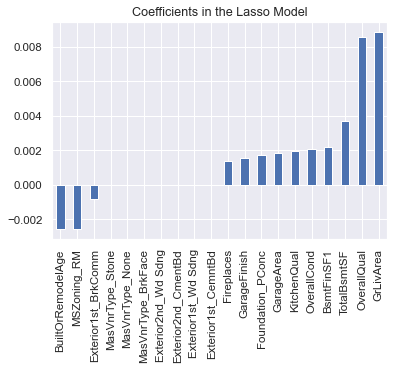

In [182]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train_lasso.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")

plt.show()

In [ ]:
Inference -OverallQual,GrLivArea  is much higher as compared to rest of the coefficients. Therefore the total salesprice would be more driven by these two features.

In [183]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

print(lasso_df.head(20))

    Coeff Values              Variables  Absolute Coefficent
11      0.008858              GrLivArea             0.008858
1       0.008549            OverallQual             0.008549
6       0.003720            TotalBsmtSF             0.003720
20     -0.002575      BuiltOrRemodelAge             0.002575
24     -0.002522            MSZoning_RM             0.002522
3       0.002174             BsmtFinSF1             0.002174
2       0.002095            OverallCond             0.002095
13      0.001946            KitchenQual             0.001946
17      0.001852             GarageArea             0.001852
35      0.001721       Foundation_PConc             0.001721
15      0.001558           GarageFinish             0.001558
14      0.001403             Fireplaces             0.001403
49      0.001225  SaleCondition_Partial             0.001225
16      0.001209             GarageCars             0.001209
0       0.001165                LotArea             0.001165
7       0.001051        

In [152]:
coefs.sort_values().head(10)

BuiltOrRemodelAge     -0.002575
MSZoning_RM           -0.002522
Exterior1st_BrkComm   -0.000832
MasVnrType_Stone       0.000000
MasVnrType_None       -0.000000
MasVnrType_BrkFace     0.000000
Exterior2nd_Wd Sdng   -0.000000
Exterior2nd_CmentBd    0.000000
Exterior1st_Wd Sdng   -0.000000
Exterior1st_CemntBd    0.000000
dtype: float64

In [153]:
coefs.sort_values().tail(10)

Fireplaces          0.001403
GarageFinish        0.001558
Foundation_PConc    0.001721
GarageArea          0.001852
KitchenQual         0.001946
OverallCond         0.002095
BsmtFinSF1          0.002174
TotalBsmtSF         0.003720
OverallQual         0.008549
GrLivArea           0.008858
dtype: float64

As per Lasso regression significant(top 5) variables which effect the price of houses are

#### positively are ( increases the price):
    0.008858              GrLivArea             
    0.008549            OverallQual             
    0.003720            TotalBsmtSF            
    0.002174             BsmtFinSF1             
    0.002095            OverallCond             
     
    
    GrLivArea: Above grade (ground) living area square feet 
    OverallQual: Rates the overall material and finish of the house 
    OverallCond : Rates the overall condition of the house 
    TotalBsmtSF: Total square feet of basement area
    BsmtFinSF1 : Type 1 finished square feet

#### negatively are ( decreases the price):
    BuiltOrRemodelAge     -0.002575
    MSZoning_RM           -0.002522
    Exterior1st_BrkComm   -0.000832
    MasVnrType_Stone       0.000000
    MasVnrType_None       -0.000000


In [154]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0012
1,OverallQual,0.0085
2,OverallCond,0.0021
3,BsmtFinSF1,0.0022
4,TotalBsmtSF,0.0037
5,CentralAir,0.0011
6,GrLivArea,0.0089
7,BsmtFullBath,0.0005
8,KitchenQual,0.0019
9,Fireplaces,0.0014


# Conclusion -
#### Comparsion between lasso and ridge regression model:

- The Negatively effecting variables have remained the same in both the models.

- But there are changes in positively effecting variables ( As per co-efficient):

We had got these variables in lasso :

    GrLivArea: Above grade (ground) living area square feet 
    OverallQual: Rates the overall material and finish of the house 
    OverallCond : Rates the overall condition of the house 
    TotalBsmtSF: Total square feet of basement area
    BsmtFinSF1 : Type 1 finished square feet
        
Whencompared to these in ridge because of change im co-efficient value. 
     
     GrLivArea         : Above grade (ground) living area square feet
    OverallQual       : Rates the overall material and finish of the house
    MSZoning_RL       : Zoning classification of the sale - Residential Medium Density 
    GarageType_Attchd : Garage Type-Attached to home
    2ndFlrSF          : Second floor square feet 
    
- Overall top 10 variables in both the model remain the same. 
- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.


- The optimal lambda value in case of Ridge and Lasso is as below
  
  1.Ridge(alpha=8.0)
  
  2.Lasso(alpha=0.0001)